### Loading the data

In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\16. Neural Networks\forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### Visualizing Data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.crosstab(data.month,data.size_category)

size_category,large,small
month,,
apr,2,7
aug,43,141
dec,8,1
feb,6,14
jan,0,2
jul,9,23
jun,3,14
mar,12,42
may,1,1


<AxesSubplot:xlabel='month'>

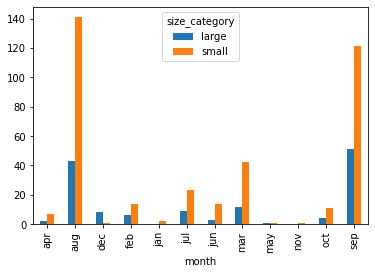

In [5]:
pd.crosstab(data.month,data.size_category).plot(kind="bar")

In [6]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

<AxesSubplot:ylabel='size_category'>

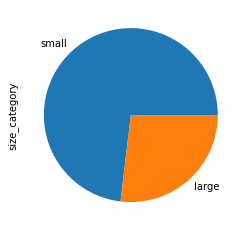

In [7]:
data.size_category.value_counts().plot(kind="pie")

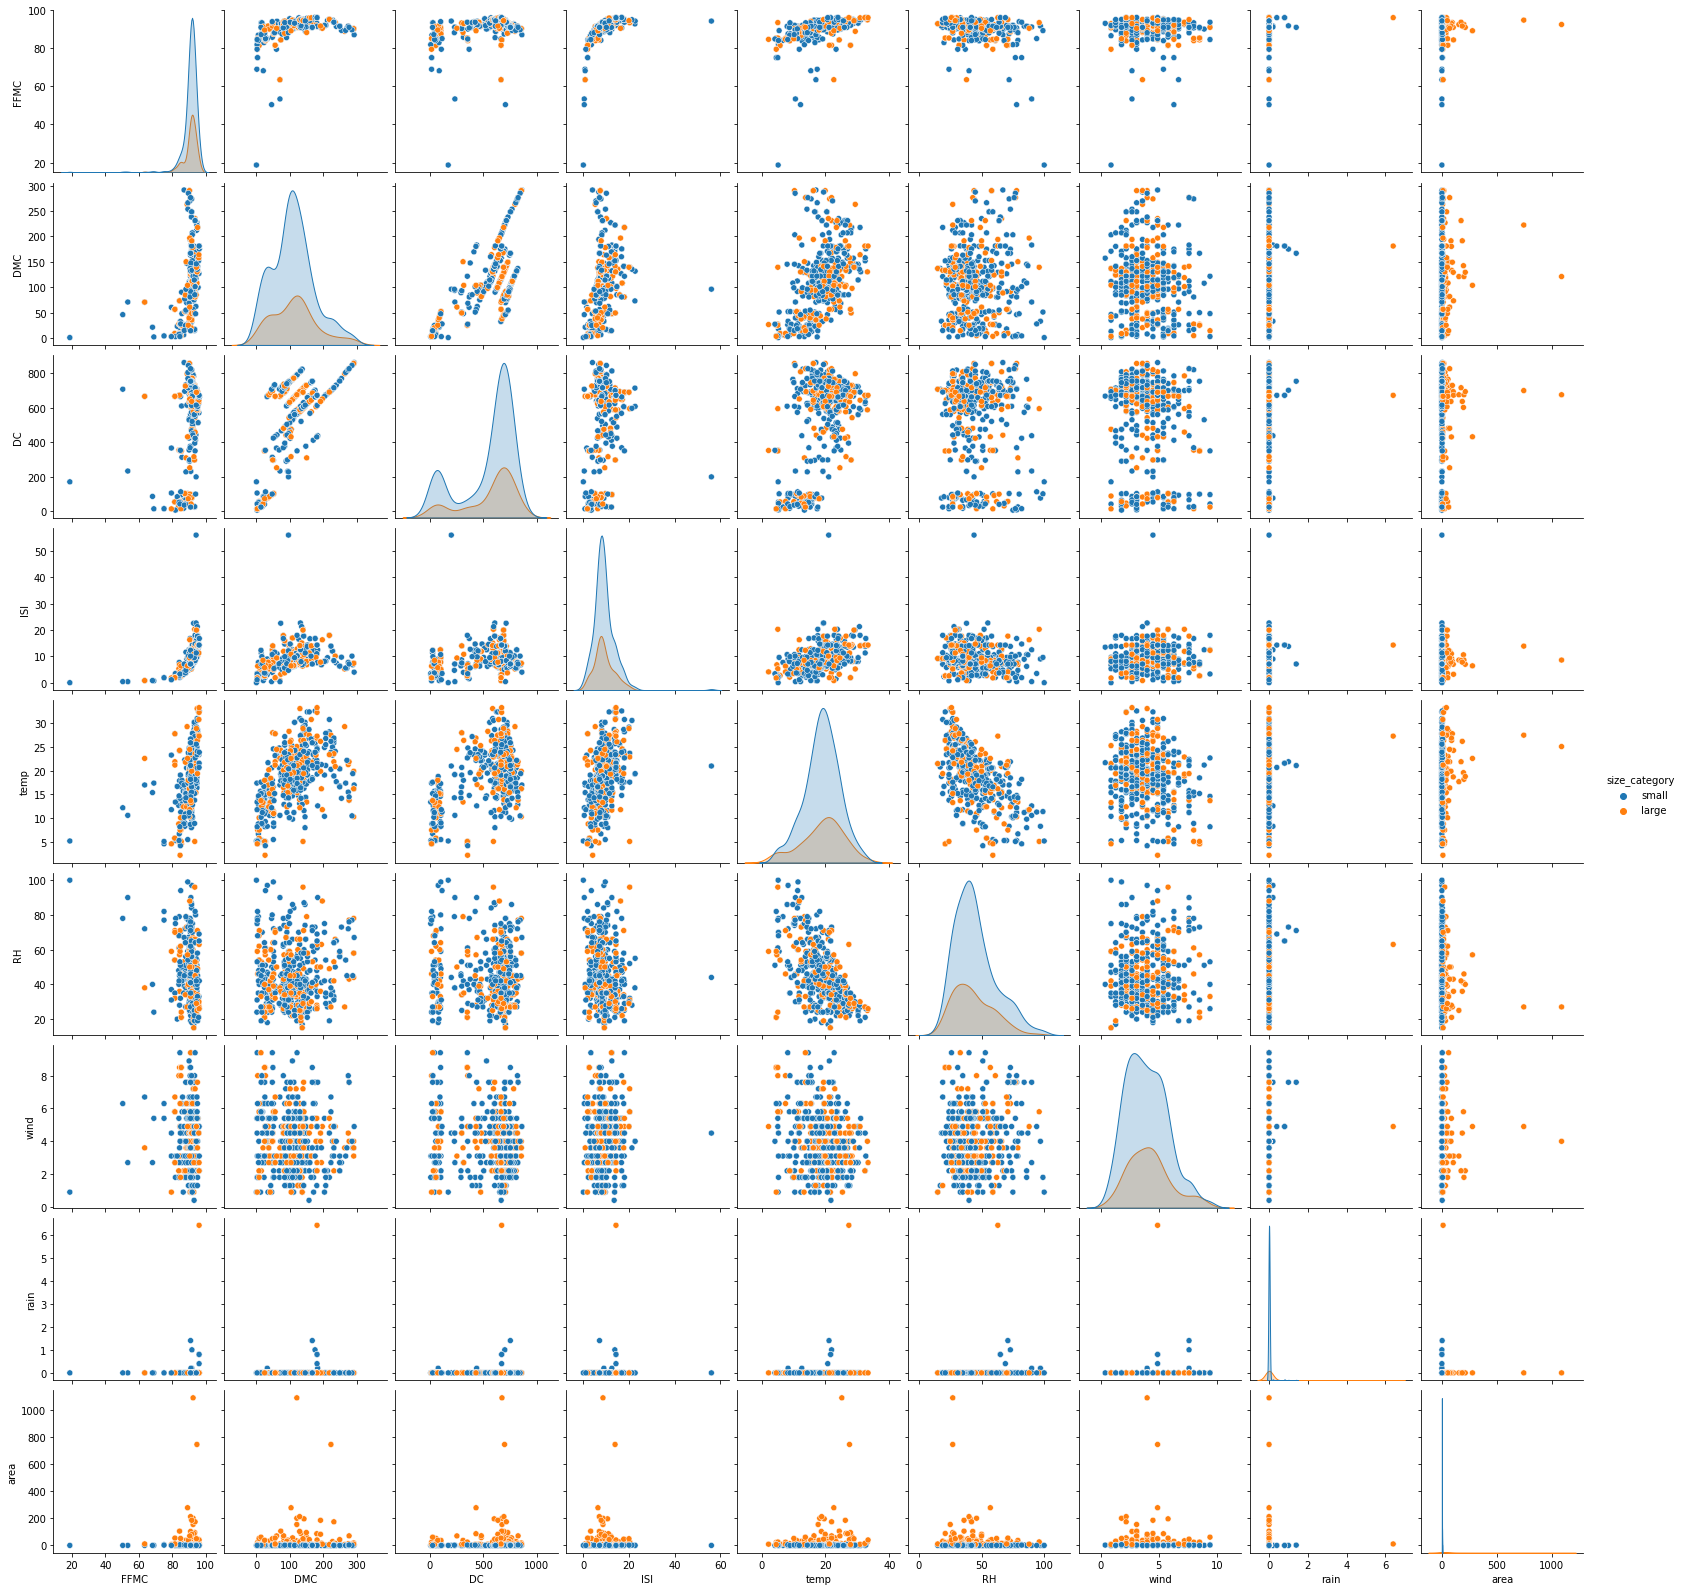

In [8]:
df=pd.concat((data.iloc[:,2:11],data.size_category),axis=1)
sns.pairplot(df,hue='size_category')
plt.show()

### Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
data['size_category'] = LabelEncoder().fit_transform(data['size_category'])
data['size_category']

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [10]:
df = data.drop(data.iloc[:,0:2], axis=1)
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
x = df.iloc[:,:-1].values
x

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   0. ],
       [ 90.6,  35.4, 669.1, ...,   0. ,   1. ,   0. ],
       [ 90.6,  43.7, 686.9, ...,   0. ,   1. ,   0. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   0. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   0. ],
       [ 79.5,   3. , 106.7, ...,   1. ,   0. ,   0. ]])

In [12]:
y = df.iloc[:,28].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

### Feature Engineering

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=5000)
rfe = RFE(model, 10)
fit = rfe.fit(x, y)

C:\Users\lenovo\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [14]:
fit.ranking_

array([ 3, 13, 14,  1,  9, 10,  7, 16,  1,  1,  8,  1,  1,  1,  1,  5, 12,
       11,  1,  2, 17,  1, 15,  6, 19, 18,  4,  1])

In [15]:
features = fit.transform(x)
features

array([[ 5.1 ,  0.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 6.7 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 6.7 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 1.9 , 11.16,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [11.3 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.1 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

## Neural Network Model

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, KFold

### Hyperparameters of the neural network

In [17]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [18]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20]
epochs = [10,50]
learning_rate = [0.01]
dropout_rate = [0.0]
activation_function = ['relu']
init = ['uniform']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

In [19]:
# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [20]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(features,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   9.8s
[CV 2/5; 1/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.3s
[CV 3/5; 1/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.2s
[CV 4/5;

[CV 2/5; 6/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.2s
[CV 3/5; 6/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 6/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.6s
[CV 4/5; 6/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 6/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.2s
[CV 5/5; 6/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 6/36] END activation_function=relu, batch_size=10, dropout_ra

[CV 4/5; 11/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   6.2s
[CV 5/5; 11/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 11/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   8.1s
[CV 1/5; 12/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 12/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   8.0s
[CV 2/5; 12/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 12/36] END activation_function=relu, batch_size=10, dro

[CV 1/5; 17/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   6.8s
[CV 2/5; 17/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 17/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   6.3s
[CV 3/5; 17/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 17/36] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   6.4s
[CV 4/5; 17/36] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 17/36] END activation_function=relu, batch_size=1

[CV 3/5; 22/36] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.9s
[CV 4/5; 22/36] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 22/36] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.8s
[CV 5/5; 22/36] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 22/36] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.5s
[CV 1/5; 23/36] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 23/36] END activation_function=relu, batch_size=20, dro

[CV 5/5; 27/36] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.8s
[CV 1/5; 28/36] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 28/36] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   5.1s
[CV 2/5; 28/36] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 28/36] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.4s
[CV 3/5; 28/36] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 28/36] END activation_function=relu, batch_size=20, dr

[CV 2/5; 33/36] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.4s
[CV 3/5; 33/36] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 33/36] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.4s
[CV 4/5; 33/36] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 33/36] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   5.1s
[CV 5/5; 33/36] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 33/36] END activation_function=relu, batch_size=20, dro

In [21]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.994193434715271, using {'activation_function': 'relu', 'batch_size': 20, 'dropout_rate': 0.0, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 16, 'neuron2': 8}
0.9651979088783265,0.02764103157551835 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 2}
0.9709484577178955,0.021237192355936702 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 4}
0.9709111213684082,0.025331709572606532 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 8}
0.9844846963882447,0.015781766629946584 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 2}
0.9786967

### Final Model

In [22]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=10,kernel_initializer  = 'uniform', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
adam = Adam(lr = 0.01)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(features, y, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
42/42 [==============================] - 1s 15ms/step - loss: 0.6207 - accuracy: 0.8039 - val_loss: 0.5666 - val_accuracy: 0.9038
Epoch 2/50
42/42 [==============================] - 0s 3ms/step - loss: 0.5430 - accuracy: 0.9467 - val_loss: 0.4940 - val_accuracy: 0.9423
Epoch 3/50
42/42 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.9685 - val_loss: 0.3933 - val_accuracy: 0.9519
Epoch 4/50
42/42 [==============================] - 0s 4ms/step - loss: 0.3352 - accuracy: 0.9734 - val_loss: 0.3007 - val_accuracy: 0.9231
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.9734 - val_loss: 0.2393 - val_accuracy: 0.9231
Epoch 6/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1895 - accuracy: 0.9685 - val_loss: 0.1995 - val_accuracy: 0.9615
Epoch 7/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.9782 - val_loss: 0.1786 - val_accuracy: 0.9519
Epoch 8/50
42/42 [=

In [23]:
# evaluate the model
scores = model.evaluate(features, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9923
accuracy: 99.23%
